<a href="https://colab.research.google.com/github/pachterlab/seqspec/blob/libspec/seqspec-summaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!rm -rf seqspec
!git clone https://github.com/pachterlab/seqspec
!cd seqspec && git checkout -b libspec origin/libspec && pip install --quiet .

Cloning into 'seqspec'...
remote: Enumerating objects: 1541, done.
remote: Counting objects: 100% (718/718), done.
remote: Compressing objects: 100% (380/380), done.
remote: Total 1541 (delta 446), reused 558 (delta 332), pack-reused 823
Receiving objects: 100% (1541/1541), 6.15 MiB | 24.81 MiB/s, done.
Resolving deltas: 100% (967/967), done.
Branch 'libspec' set up to track remote branch 'libspec' from 'origin'.
Switched to a new branch 'libspec'
  Preparing metadata (setup.py) ... done


In [8]:
!git clone https://github.com/IGVF/seqspec/ igvf_seqspec

fatal: destination path 'igvf_seqspec' already exists and is not an empty directory.


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
fsize=15

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [10]:
!for s in igvf_seqspec/specs/*/spec.yaml; do grep -e name -e date $s | head -2 | sed 's/\: /:/g' | cut -f 2 -d":" | tr '\n' '\t' && echo -e "\n"; done > dates.txt

In [11]:

df = pd.read_csv("dates.txt", header=None, names=["assay", "date", "bad"], sep="\t").drop(columns=["bad"]).dropna()

# Define a function to clean the date strings
def clean_date(date_str):
    if date_str.strip() == '':
        return "01 January 1970"  # Return None for empty strings
    return date_str.strip("'")  # Remove leading and trailing single quotes

# Apply the function to the "date" column
df['date'] = df['date'].apply(clean_date)

fmt = "%d %B %Y"
dates = df["date"]
descriptions = df["assay"]
levels = np.tile([-9,9-7,7,-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/8)))[:len(dates)]


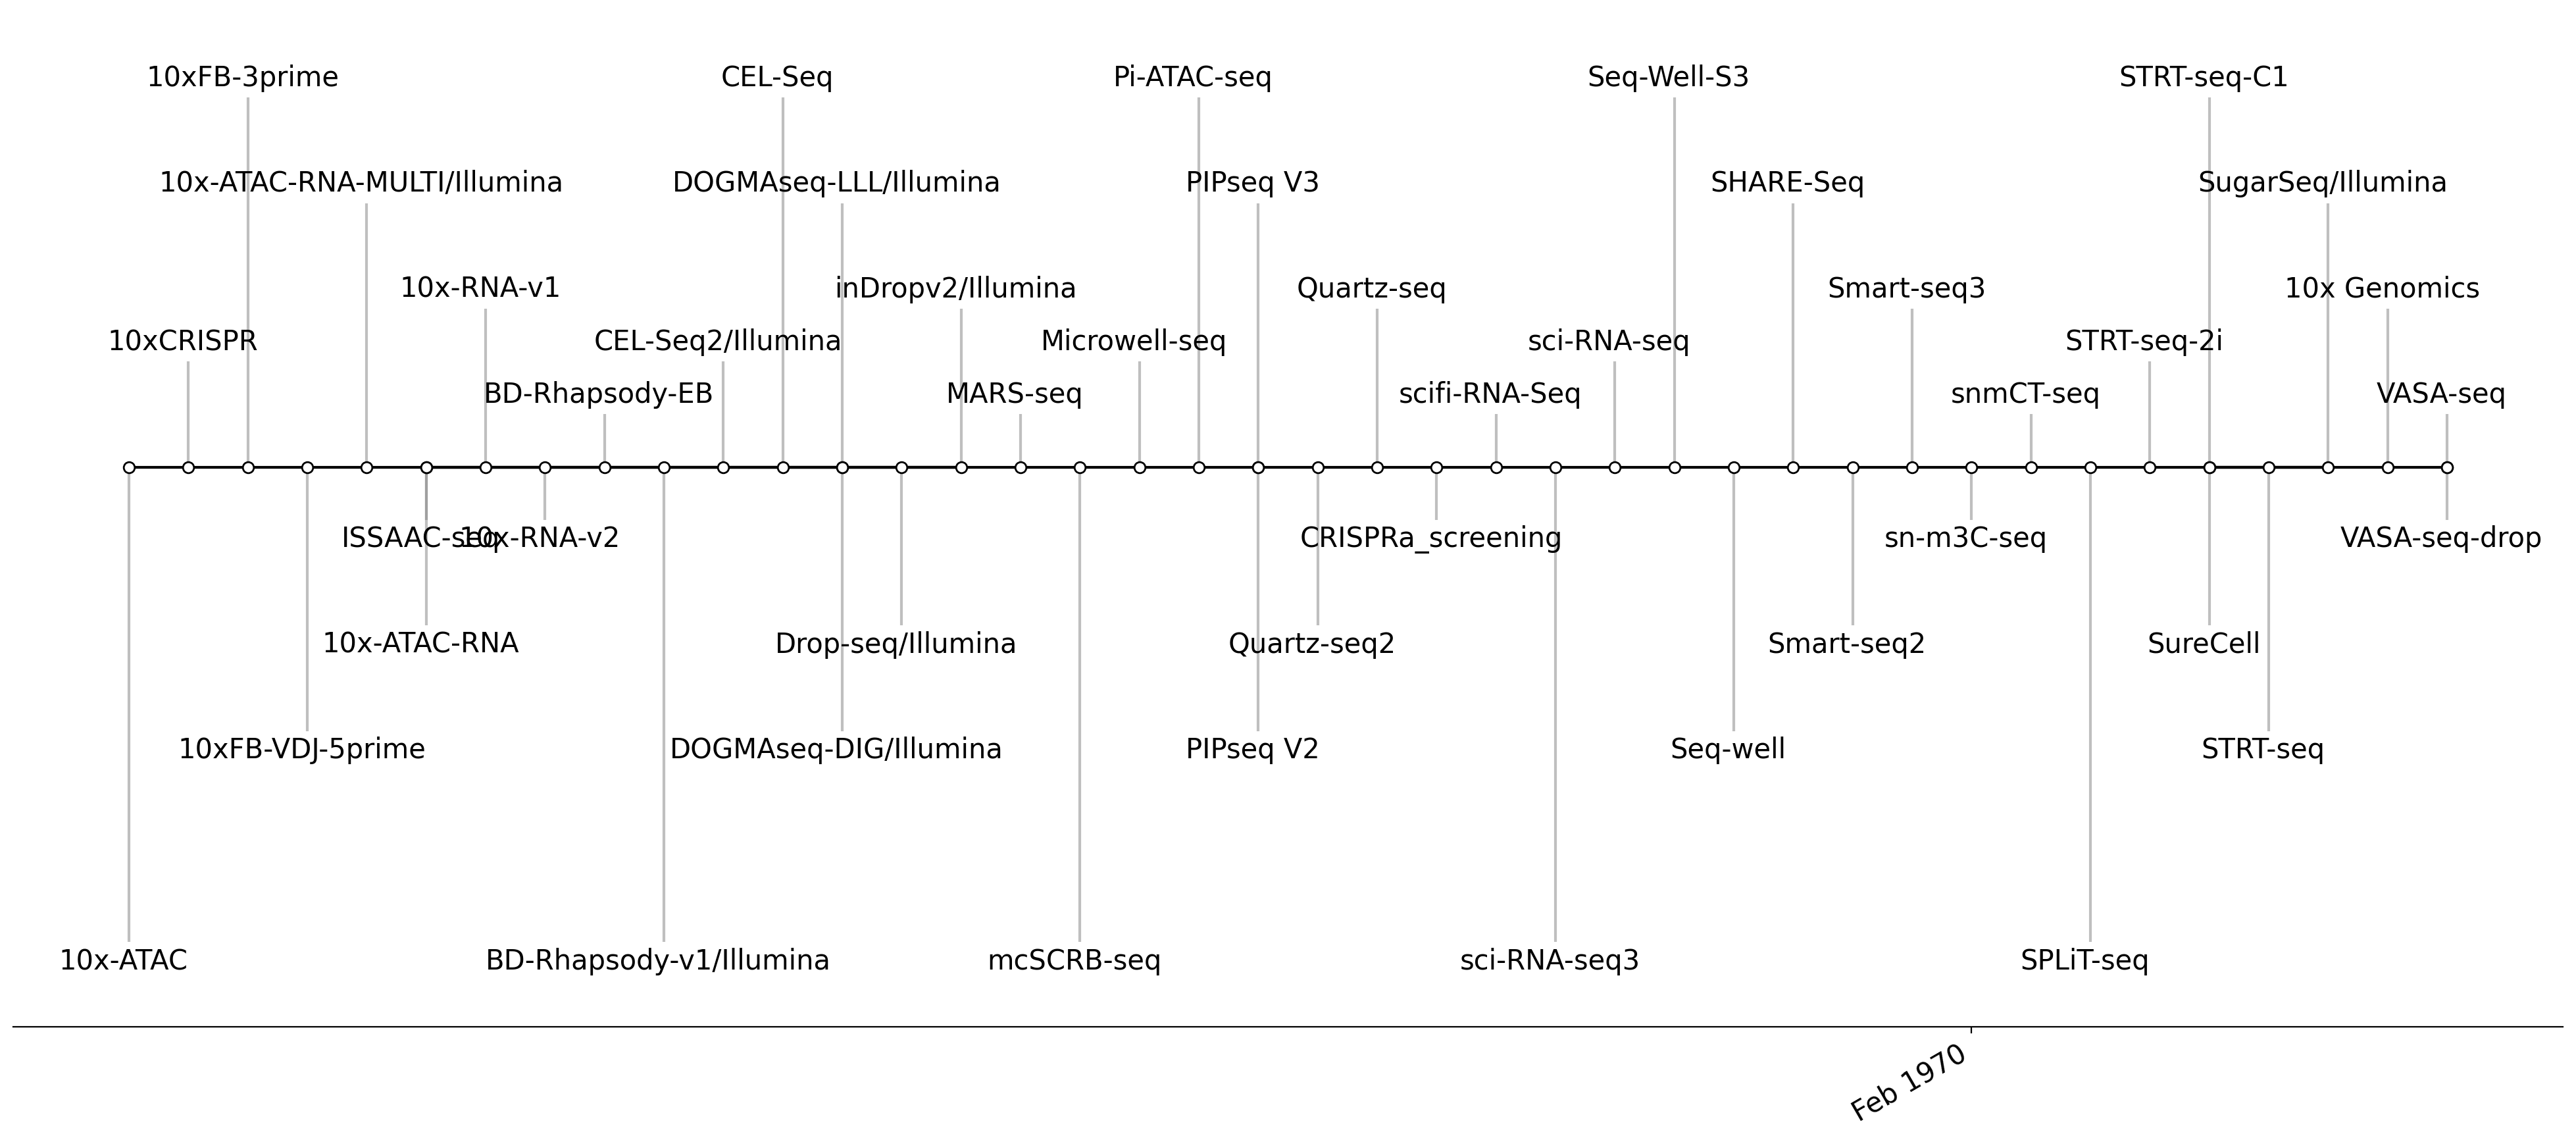

In [12]:

# plotting
# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(25, 10))

ax.vlines(dates, 0, levels, color="grey", alpha=0.5)  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o", color="k", markerfacecolor="w")  # Baseline and markers on it.
# ax.plot(new_cases.index.values, new_cases.values/new_cases.max()*10, color="lightgrey", label="New cases", zorder = -2)
# annotate lines
for d, l, desc in zip(dates, levels, descriptions):

  weight = "light"
  # if tl["highlight"]:
  #   weight = "bold"
  ax.annotate(desc, xy=(d, l),
              xytext=(-3, np.sign(l)*3), textcoords="offset points",
              horizontalalignment="center",
              verticalalignment="bottom" if l > 0 else "top", weight=weight)

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=3))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

# ax.axvline(x=datetime.strptime("January 01, 2021", fmt), color="lightgrey", linestyle="--", zorder=-1)
ax.margins(y=0.1)
ax.set(**{
    "title": ""
})

fig.show()